In [1]:
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import tree
import getfeat
%matplotlib inline

In [2]:
start=datetime(2015,3,1,0)
end=datetime(2015,5,1,0)
timestep=3600
n_timeslots=int((end-start).total_seconds()/timestep+1)

In [2]:
Q=getfeat.get_composed_feat_h(4)


(10, 366)


In [4]:
X=Q[0].T
Y=Q[1]


In [5]:
len(Y)

366

In [29]:
Y_q=np.zeros(len(Y))
i=0
for y in Y:
    if y in [0,1,2]:
        score=0
    elif y in [3,4,5]:
        score =1
    elif y in [6,7,8,9,10]:
        score =2
    #elif y in [11,12,13]:
        #score =3
    else:
        score =4
    Y_q[i]=score
    i+=1

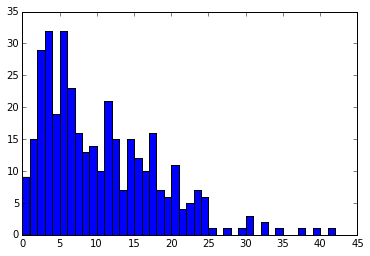

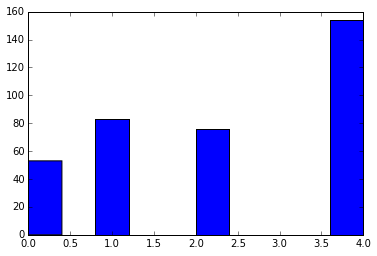

In [30]:
plt.hist(Y, list(range(int(max(Y)+1))))
plt.show()
plt.hist(Y_q)
plt.show()

In [31]:
I=np.random.permutation(len(X))
clf = tree.DecisionTreeClassifier()
AAA=[]
choose=0
for choose in [[i] for i in range(len(X[0]))]:
    m=[]
    s=[]
    acc=[]
    P=[]
    R=[]
    for i in range(3):
        I_te=list(range(50*i,50*(i+1)))
        I_tr=list(range(0,50*i))+list(range(50*(i+1),len(I)))
        train=I[I_tr]
        test=I[I_te]

        XX = np.array([d[choose] for d in X[train]])
        y=Y_q[train] 
        clf = clf.fit(XX, y)
        true=np.array([int(Y_q[t]) for t in test])
        pred=np.array([int(clf.predict([X[t][choose]])[0]) for t in test])
        m.append(np.average(np.abs(true-pred)))
        s.append(np.std(true-pred))
        acc.append(accuracy_score(true,pred))
        conf=confusion_matrix(true,pred) 
        recall=[0 if not conf[i,i] else float(conf[i,i])/sum(conf[i,:]) for i in range(len(conf[:,0]))]
        precision=[0 if not conf[i,i] else float(conf[i,i])/sum(conf[:,i]) for i in range(len(conf[:,0]))]
        R.append(recall)
        P.append(precision)
    R=np.array(R)
    P=np.array(P)
    #print '***************\n','features: ',choose,'\naverage values on crossvalidation run\n'
    #print 'distance from true: '.ljust(25),round(np.average(m),2)
    #print 'std from true: '.ljust(25),round(np.average(s),2)
    #print 'accuracy: '.ljust(25),round(np.average(acc),2)
    AAA.append(np.average(acc))
    #PP=np.average(P,0)
    #RR=np.average(R,0)
    #print '\nclass'.ljust(6),'precision'.ljust(10),'recall'.ljust(15)
    #for i in range(len(PP) ):
        #print str(i).ljust(6),str(round(PP[i],2)).ljust(10),str(round(RR[i],2)).ljust(15)
    #print 'avg'.ljust(6),str(round(np.average(PP),2)).ljust(10),str(round(np.average(RR),2)).ljust(15)

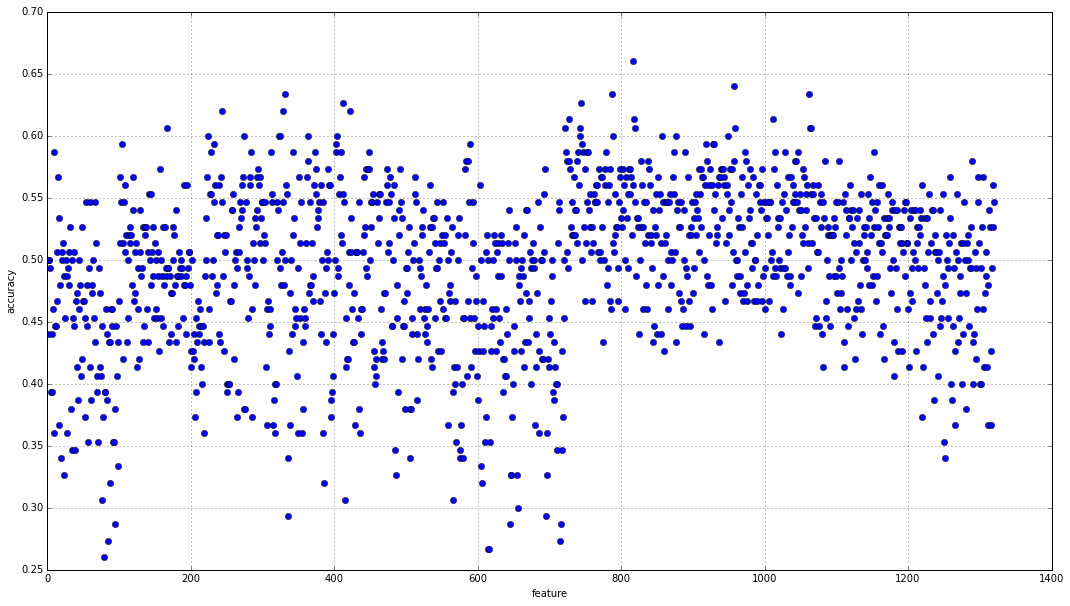

In [32]:
plt.figure(figsize=(18,10))
plt.plot(AAA,'o')
plt.ylabel('accuracy')
plt.xlabel('feature')
plt.grid()
plt.show()

In [28]:
names=np.array(Q[2])
Ind=np.where(np.array(AAA)>0.39)[0]

In [31]:
AAA[-2:]

[0.29333333333333333, 0.37666666666666671]

prova test==train

In [18]:
I=np.random.permutation(len(X))
for choose in [[list(range(len(X[0])))]]:
    m=[]
    s=[]
    acc=[]
    P=[]
    R=[]
    for i in range(3):
        I_te=list(range(50*i,50*(i+1)))
        I_tr=list(range(0,50*i))+list(range(50*(i+1),len(I)))
        train=I[I_tr]
        test=I[I_te]

        XX = np.array([d[choose] for d in X[train]])
        y=Y_q[train] 
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(XX, y)
        true=np.array([int(Y_q[t]) for t in test])
        pred=np.array([int(clf.predict([X[t][choose]])[0]) for t in test])
        m.append(np.average(np.abs(true-pred)))
        s.append(np.std(true-pred))
        acc.append(accuracy_score(true,pred))
        conf=confusion_matrix(true,pred) 
        recall=[0 if not conf[i,i] else float(conf[i,i])/sum(conf[i,:]) for i in range(len(conf[:,0]))]
        precision=[0 if not conf[i,i] else float(conf[i,i])/sum(conf[:,i]) for i in range(len(conf[:,0]))]
        R.append(recall)
        P.append(precision)
    R=np.array(R)
    P=np.array(P)
    print '***************\n','features: ',choose,'\naverage values on crossvalidation run\n'
    print 'distance from true: '.ljust(25),round(np.average(m),2)
    print 'std from true: '.ljust(25),round(np.average(s),2)
    print 'accuracy: '.ljust(25),round(np.average(acc),2)
    PP=np.average(P,0)
    RR=np.average(R,0)
    print '\nclass'.ljust(6),'precision'.ljust(10),'recall'.ljust(15)
    for i in range(len(PP) ):
        print str(i).ljust(6),str(round(PP[i],2)).ljust(10),str(round(RR[i],2)).ljust(15)
    print 'avg'.ljust(6),str(round(np.average(PP),2)).ljust(10),str(round(np.average(RR),2)).ljust(15)

***************
features:  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 2

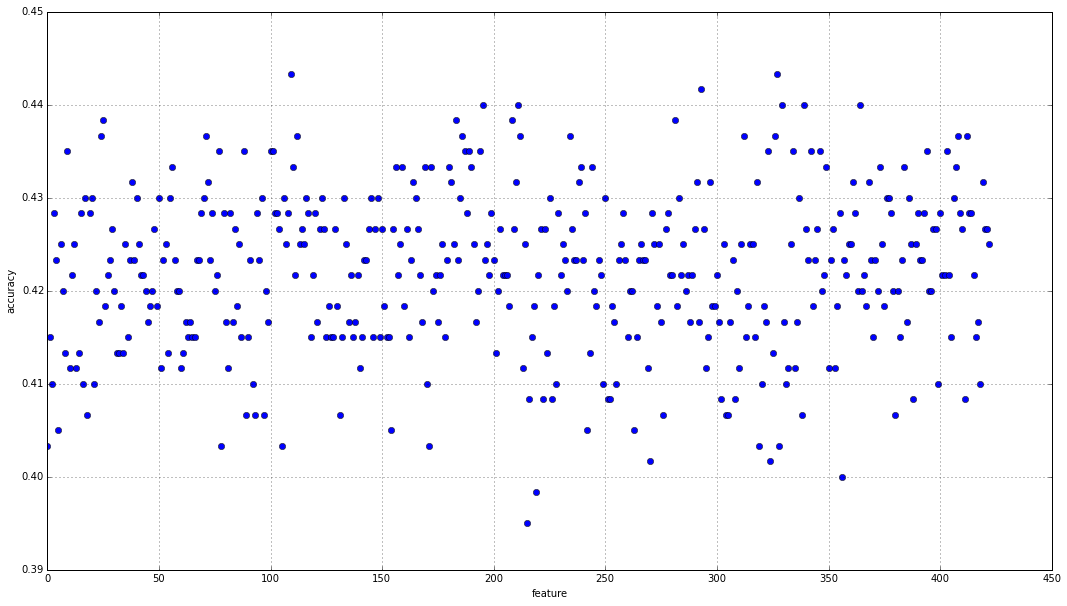

In [21]:
I=np.random.permutation(len(X))
n_est=100
clfs=[RandomForestClassifier(n_estimators=n_est, max_features=i) for i in range(1,len(X[0]))]+[BaggingClassifier(max_features=i,n_estimators=n_est) for i in range(1,len(X[0]))]+[GradientBoostingClassifier(n_estimators=n_est, learning_rate=1.0,max_depth=1, random_state=0)]
names=['random forest'+str(i) for i in range(1,len(X[0]))]+['bagging'+str(i) for i in range(1,len(X[0]))]+['GradientBoosting']
BBB=[]
for clf in clfs:
    m=[]
    s=[]
    acc=[]
    P=[]
    R=[]
    for i in range(3):
        I_te=list(range(200*i,200*(i+1)))
        I_tr=list(range(0,200*i))+list(range(200*(i+1),len(I)))
        train=I[I_tr]
        test=I[I_te]
        XX =X[train]
        y=Y_q[train] 
        clf = clf.fit(XX, y)
        true=np.array([int(Y_q[t]) for t in test])
        pred=np.array([int(clf.predict([X[t]])[0]) for t in test])
        m.append(np.average(np.abs(true-pred)))
        s.append(np.std(true-pred))
        acc.append(accuracy_score(true,pred))
        conf=confusion_matrix(true,pred) 
        recall=[0 if not conf[i,i] else float(conf[i,i])/sum(conf[i,:]) for i in range(len(conf[:,0]))]
        precision=[0 if not conf[i,i] else float(conf[i,i])/sum(conf[:,i]) for i in range(len(conf[:,0]))]
        R.append(recall)
        P.append(precision)
    R=np.array(R)
    P=np.array(P)
    #print '\n*',names[clfs.index(clf)],'*'
    #print 'distance from true: '.ljust(25),round(np.average(m),2)
    #print 'std from true: '.ljust(25),round(np.average(s),2)
    #print 'accuracy: '.ljust(25),round(np.average(acc),2)
    BBB.append(np.average(acc))
    #PP=np.average(P,0)
    #RR=np.average(R,0)
    #print '\nclass'.ljust(6),'precision'.ljust(10),'recall'.ljust(15)
    #for i in range(len(PP) ):
        #print str(i).ljust(6),str(round(PP[i],2)).ljust(10),str(round(RR[i],2)).ljust(15)
    #print 'avg'.ljust(6),str(round(np.average(PP),2)).ljust(10),str(round(np.average(RR),2)).ljust(15)
plt.figure(figsize=(18,10))
plt.plot(BBB,'o')
plt.ylabel('accuracy')
plt.xlabel('feature')
plt.grid()
plt.show()

In [22]:
N=np.array(names)[np.where(np.array(BBB)>.435)[0]]
S=np.array(BBB)[np.where(np.array(BBB)>.435)[0]]
for i in range(len(N)):
    print N[i].ljust(17),round(S[i],3)

random forest25   0.437
random forest26   0.438
random forest72   0.437
random forest110  0.443
random forest113  0.437
random forest184  0.438
random forest187  0.437
random forest196  0.44
random forest209  0.438
bagging1          0.44
bagging2          0.437
bagging24         0.437
bagging71         0.438
bagging83         0.442
bagging102        0.437
bagging116        0.437
bagging117        0.443
bagging119        0.44
bagging129        0.44
bagging154        0.44
bagging198        0.437
bagging202        0.437


In [39]:
len(X)

366

In [42]:
I=np.random.permutation(len(X))
n_est=200
#clfs=[RandomForestClassifier(n_estimators=n_est, max_features=i) for i in range(1,len(X[0]))]+[BaggingClassifier(max_features=i,n_estimators=n_est) for i in range(1,len(X[0]))]+[GradientBoostingClassifier(n_estimators=n_est, learning_rate=1.0,max_depth=1, random_state=0)]
#names=['random forest'+str(i) for i in range(1,len(X[0]))]+['bagging'+str(i) for i in range(1,len(X[0]))]+['GradientBoosting']
clfs=[RandomForestClassifier(n_estimators=n_est, max_features=i, n_jobs=-1) for i in [1,2,4,8,16,32,50,100]]
names=['random forest'+str(i) for i in range(1,100)]
BBB=[]
count=0
for clf in clfs:
    m=[]
    s=[]
    acc=[]
    P=[]
    R=[]
    for i in range(3):
        n=50
        I_te=list(range(n*i,n*(i+1)))
        I_tr=list(range(0,n*i))+list(range(n*(i+1),len(I)))
        train=I[I_tr]
        test=I[I_te]
        XX =X[train]
        y=Y_q[train] 
        clf = clf.fit(XX, y)
        true=np.array([int(Y_q[t]) for t in test])
        pred=np.array([int(clf.predict([X[t]])[0]) for t in test])
        m.append(np.average(np.abs(true-pred)))
        s.append(np.std(true-pred))
        acc.append(accuracy_score(true,pred))
        conf=confusion_matrix(true,pred) 
        recall=[0 if not conf[i,i] else float(conf[i,i])/sum(conf[i,:]) for i in range(len(conf[:,0]))]
        precision=[0 if not conf[i,i] else float(conf[i,i])/sum(conf[:,i]) for i in range(len(conf[:,0]))]
        R.append(recall)
        P.append(precision)
    R=np.array(R)
    P=np.array(P)
    #print '\n*',names[clfs.index(clf)],'*'
    #print 'distance from true: '.ljust(25),round(np.average(m),2)
    #print 'std from true: '.ljust(25),round(np.average(s),2)
    #print 'accuracy: '.ljust(25),round(np.average(acc),2)
    BBB.append(np.average(acc))
    #PP=np.average(P,0)
    #RR=np.average(R,0)
    #print '\nclass'.ljust(6),'precision'.ljust(10),'recall'.ljust(15)
    #for i in range(len(PP) ):
        #print str(i).ljust(6),str(round(PP[i],2)).ljust(10),str(round(RR[i],2)).ljust(15)
    #print 'avg'.ljust(6),str(round(np.average(PP),2)).ljust(10),str(round(np.average(RR),2)).ljust(15)
    print count, np.average(acc)
plt.figure(figsize=(18,10))
plt.plot(BBB,'o')
plt.ylabel('accuracy')
plt.xlabel('feature')
plt.grid()
plt.show()

0 0.606666666667
0 0.606666666667
0 0.586666666667
0 0.58


KeyboardInterrupt: 

[0.39999999999999997]
0 0.4


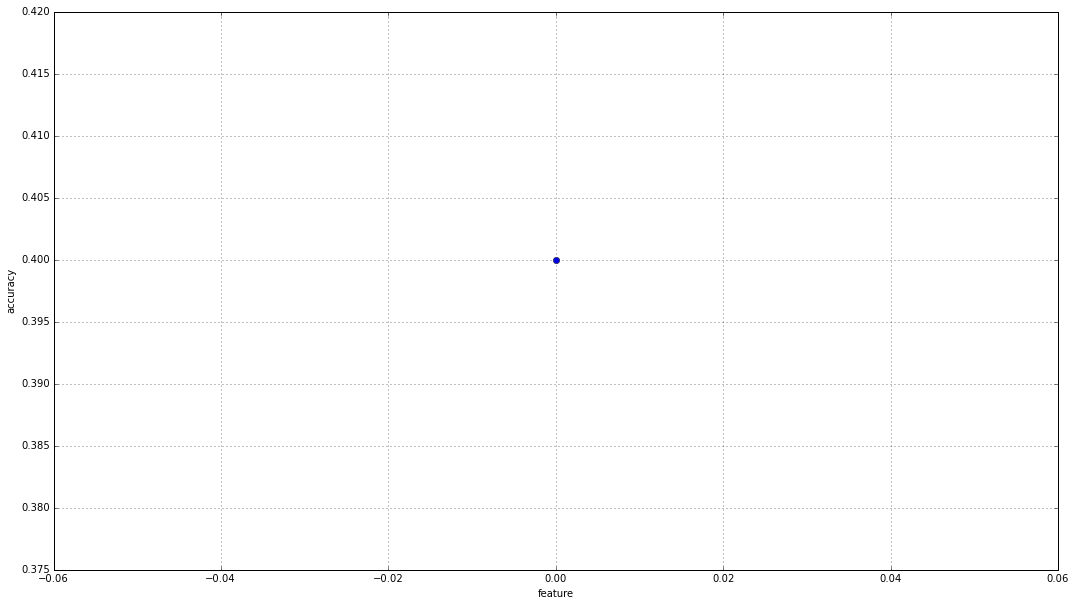

In [35]:
I=np.random.permutation(len(X))
n_est=100
#clfs=[RandomForestClassifier(n_estimators=n_est, max_features=i) for i in range(1,len(X[0]))]+[BaggingClassifier(max_features=i,n_estimators=n_est) for i in range(1,len(X[0]))]+[GradientBoostingClassifier(n_estimators=n_est, learning_rate=1.0,max_depth=1, random_state=0)]
#names=['random forest'+str(i) for i in range(1,len(X[0]))]+['bagging'+str(i) for i in range(1,len(X[0]))]+['GradientBoosting']
clfs=[AdaBoostClassifier()]
names=['random forest'+str(i) for i in range(1,100)]
BBB=[]
count=0
for clf in clfs:
    m=[]
    s=[]
    acc=[]
    P=[]
    R=[]
    for i in range(3):
        n=50
        I_te=list(range(n*i,n*(i+1)))
        I_tr=list(range(0,n*i))+list(range(n*(i+1),len(I)))
        train=I[I_tr]
        test=I[I_te]
        XX =X[train]
        y=Y_q[train] 
        clf = clf.fit(XX, y)
        true=np.array([int(Y_q[t]) for t in test])
        pred=np.array([int(clf.predict([X[t]])[0]) for t in test])
        m.append(np.average(np.abs(true-pred)))
        s.append(np.std(true-pred))
        acc.append(accuracy_score(true,pred))
        conf=confusion_matrix(true,pred) 
        recall=[0 if not conf[i,i] else float(conf[i,i])/sum(conf[i,:]) for i in range(len(conf[:,0]))]
        precision=[0 if not conf[i,i] else float(conf[i,i])/sum(conf[:,i]) for i in range(len(conf[:,0]))]
        R.append(recall)
        P.append(precision)
    R=np.array(R)
    P=np.array(P)
    #print '\n*',names[clfs.index(clf)],'*'
    #print 'distance from true: '.ljust(25),round(np.average(m),2)
    #print 'std from true: '.ljust(25),round(np.average(s),2)
    #print 'accuracy: '.ljust(25),round(np.average(acc),2)
    BBB.append(np.average(acc))
    print BBB
    #PP=np.average(P,0)
    #RR=np.average(R,0)
    #print '\nclass'.ljust(6),'precision'.ljust(10),'recall'.ljust(15)
    #for i in range(len(PP) ):
        #print str(i).ljust(6),str(round(PP[i],2)).ljust(10),str(round(RR[i],2)).ljust(15)
    #print 'avg'.ljust(6),str(round(np.average(PP),2)).ljust(10),str(round(np.average(RR),2)).ljust(15)
    print count, np.average(acc)
plt.figure(figsize=(18,10))
plt.plot(BBB,'o')
plt.ylabel('accuracy')
plt.xlabel('feature')
plt.grid()
plt.show()